## CELL2CELL DATASET

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, log_loss, classification_report


sns.set()

In [53]:
!ls ./data

X.csv
cell2cellholdout.csv
cell2celltrain.csv
train_X.csv
train_X_2.csv
train_y.csv
train_y_2.csv
y.csv


In [54]:
train_df = pd.read_csv("dataset/cell2celltrain.csv")
train_df.shape

(51047, 58)

In [55]:
train_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [56]:
holdout_df = pd.read_csv("dataset/cell2cellholdout.csv")
holdout_df.shape

(20000, 58)

In [57]:
holdout_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


## EDA CELL2CELLTRAIN

In [58]:
## Check dataset having duplicated ID or not
len(np.unique(train_df.CustomerID)) == len(train_df)

True

In [59]:
num_cols = train_df.columns[train_df.dtypes != 'object']
skew = train_df[num_cols].skew().sort_values(ascending = False)
skew = skew[skew > 0.75].index.tolist()
len(skew)

30

In [60]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.000,3399994.00
MonthlyRevenue,50891.0,5.883449e+01,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,5.256534e+02,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,4.683009e+01,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,8.952290e-01,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,4.002778e+01,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244e+00,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-1.154791e+01,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985e+00,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50
DroppedCalls,51047.0,6.011489e+00,9.043955,0.00,0.70,3.00,7.700,221.70


In [61]:
for c in skew:
    if train_df[c].min() < 0:
        train_df[c] = train_df[c] - train_df[c].min()
    train_df[c] = train_df[c].apply(np.log1p)

In [62]:
churn = {"Yes":1, "No": 0}
train_df.Churn = train_df.Churn.map(churn)

In [63]:
train_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,3.439456,5.393628,3.526361,0.223144,0.0,0.0,-157.0,6.993658,...,0.0,4,No,0.000000,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,3.184698,2.397895,3.367296,0.000000,0.0,0.0,-4.0,7.010943,...,0.0,5,No,0.000000,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,3.810433,2.197225,3.912023,0.000000,0.0,0.0,-2.0,7.010943,...,0.0,6,No,0.000000,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,4.493680,7.180070,4.465908,0.806476,0.0,0.0,157.0,7.018223,...,0.0,6,No,0.000000,10,No,4-Medium,Other,Other,No
4,3000026,1,3.190888,0.000000,3.367296,0.000000,0.0,0.0,0.0,7.010763,...,0.0,9,No,0.693147,10,No,1-Highest,Other,Professional,Yes


In [64]:
object_col = [col for col in train_df.columns if train_df[col].dtype =="object" ]

In [65]:
train_df[object_col].head()

,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,No,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,MILMIL414,Yes,No,No,No,No,Unknown,No,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,No,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes


In [66]:
binary_col = []
for col in object_col:
    uniq = train_df[col].unique()
    if len(uniq) == 2 and ("Yes" in uniq) and ("No" in uniq):
        binary_col.append(col)
binary_col

['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [67]:
non_binary_col = [col for col in object_col if col not in binary_col]
train_df[non_binary_col].head()

,ServiceArea,Homeownership,HandsetPrice,CreditRating,PrizmCode,Occupation,MaritalStatus
0,SEAPOR503,Known,30,1-Highest,Suburban,Professional,No
1,PITHOM412,Known,30,4-Medium,Suburban,Professional,Yes
2,MILMIL414,Unknown,Unknown,3-Good,Town,Crafts,Yes
3,PITHOM412,Known,10,4-Medium,Other,Other,No
4,OKCTUL918,Known,10,1-Highest,Other,Professional,Yes


In [68]:
def preprocessing(df):
    result_df = pd.DataFrame()
    result_df = df.fillna(-1)
    result_df.Homeownership = result_df.Homeownership.replace({"Unknown":0, "Known":1})
    result_df.replace({"Unknown":-1}, inplace=True)
    result_df.replace({"Yes":1, "No":0}, inplace=True)
    result_df.CreditRating = result_df.CreditRating.apply(lambda k: k[0])
    result_df.drop(columns=["ServiceArea"], inplace=True)
    dummy_col = [col for col in result_df.columns if result_df[col].dtype=="object"]
    result_df = pd.get_dummies(result_df, columns=dummy_col, drop_first=True)
    return result_df

In [69]:
final_df = preprocessing(train_df)
final_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,1,3.439456,5.393628,3.526361,0.223144,0.0,0.0,-157.0,6.993658,...,0,1,0,0,0,0,1,0,0,0
1,3000010,1,3.184698,2.397895,3.367296,0.000000,0.0,0.0,-4.0,7.010943,...,0,1,0,0,0,0,1,0,0,0
2,3000014,0,3.810433,2.197225,3.912023,0.000000,0.0,0.0,-2.0,7.010943,...,0,0,1,1,0,0,0,0,0,0
3,3000022,0,4.493680,7.180070,4.465908,0.806476,0.0,0.0,157.0,7.018223,...,0,0,0,0,0,1,0,0,0,0
4,3000026,1,3.190888,0.000000,3.367296,0.000000,0.0,0.0,0.0,7.010763,...,0,0,0,0,0,0,1,0,0,0


## Feature Engineer

In [70]:
y = final_df.Churn
X = final_df.iloc[:,1:].copy()
X.drop(columns=["Churn"], inplace=True)

In [71]:
X.shape

(51047, 82)

## PCA

Text(0, 0.5, 'Explained Variance Ratio')

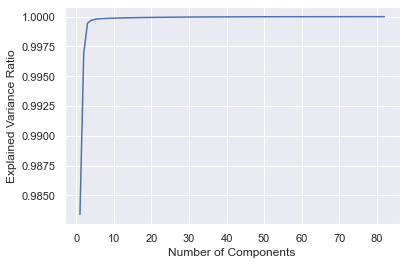

In [72]:
X1 = X.copy()
var = []
for n in range(1, 83):
    pca = PCA(n_components = n)
    x = pca.fit_transform(X1)
    var.append(pca.explained_variance_ratio_.sum())

plt.plot(range(1, 83), var)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

In [73]:
##Choose n = 50
pca = PCA(n_components = 50)
X1 = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9999936815218934

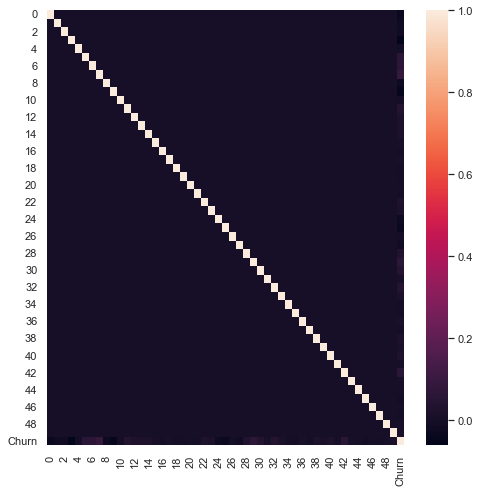

In [74]:
# visualize correlations between features and label
data1 = pd.DataFrame(X1)
data1['Churn'] = final_df.Churn
corr = data1.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr);

In [75]:
pd.DataFrame(X).to_csv("./data/X.csv")
pd.DataFrame(X1).to_csv("./data/train_X.csv")
pd.DataFrame(y).to_csv("./data/train_y.csv")

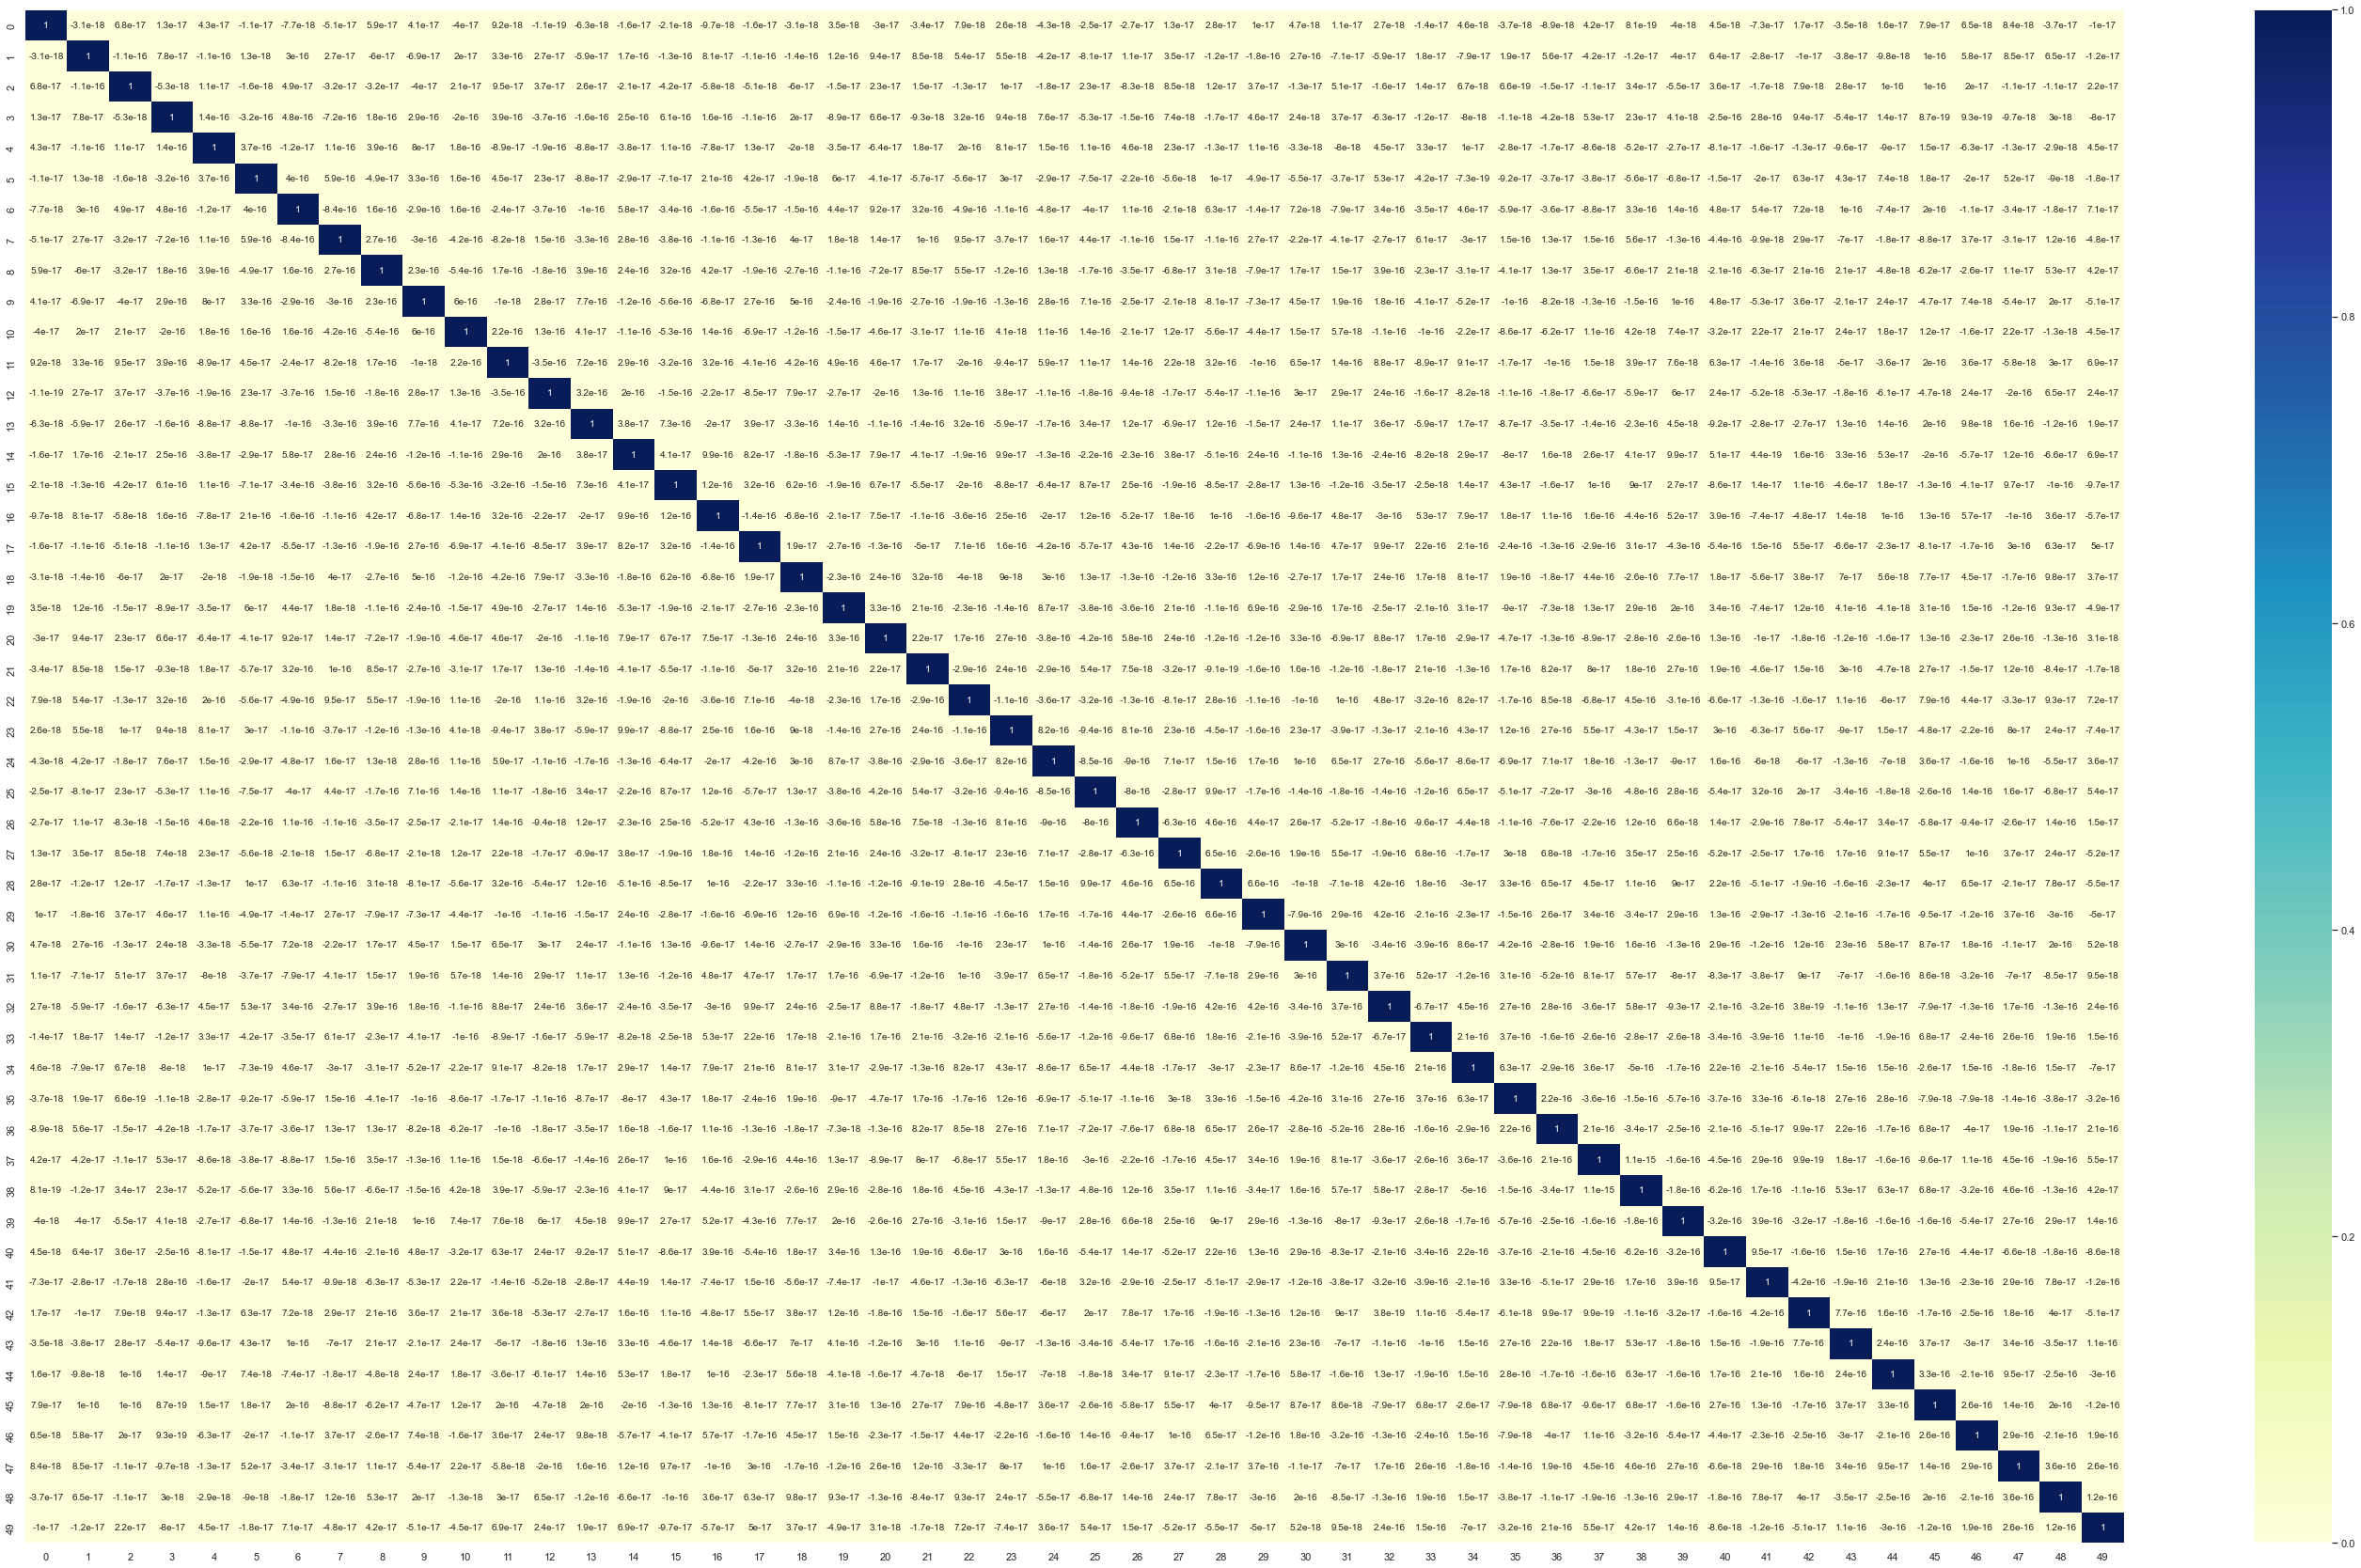

In [8]:
data = pd.read_csv("./data/train_X.csv", index_col=0)
plt.figure(figsize=(50,30))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.savefig("corr_c2c")

## Training

In [2]:
X = pd.read_csv("dataset/train_X.csv", index_col=0)
y = pd.read_csv("dataset/train_y.csv", index_col=0)

In [77]:
# stratified split

#sp = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 708)
#t, test = next(sp.split(X, y))
# get training and testing data
#X_t = X.iloc[t, :]
#X_test = X.iloc[test, :]
#y_t = y.iloc[t]
#y_test = y.iloc[test]

In [78]:
# split again to get validation data
#sp = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 798)
#train, val = next(sp.split(X_t, y_t))
# get training and validation data
#X_train = X_t.iloc[train, :]
#X_val = X_t.iloc[val, :]
#y_train = y_t.iloc[train]
#y_val = y_t.iloc[val]

In [79]:
#print(X_train.shape)
#print(X_val.shape)
#print(X_test.shape)

## XGBoost

In [3]:
import xgboost as xgb

In [4]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

In [6]:
#acc_train_xgb = accuracy_score(xgb_model.predict(X_train), y_train)
#acc_val_xgb = accuracy_score(xgb_model.predict(X_val), y_val)
#acc_test_xgb = accuracy_score(xgb_model.predict(X_test), y_test)

In [7]:
#print("Accuracy Train:", accuracy_score(xgb_model.predict(X_train), y_train))
#print("Accuracy Val:", accuracy_score(xgb_model.predict(X_val), y_val))
#print("Accuracy Test:", accuracy_score(xgb_model.predict(X_test), y_test))

In [8]:
#logloss_train_xgb = log_loss(y_train,xgb_model.predict_proba(X_train))
#logloss_val_xgb = log_loss(y_val,xgb_model.predict_proba(X_val))
#logloss_test_xgb = log_loss(y_test,xgb_model.predict_proba(X_test))

In [9]:
scores_xgb = cross_validate(xgb_model,X,y, cv = 5, scoring = ["neg_log_loss", "f1", "accuracy","roc_auc"])
scores_xgb

{'fit_time': array([35.42003345, 35.89138842, 33.86561942, 36.95256281, 34.92588234]),
 'score_time': array([0.16090345, 0.13285661, 0.13777804, 0.13079238, 0.1273458 ]),
 'test_neg_log_loss': array([-0.60100409, -0.60701252, -0.60857088, -0.59658476, -0.6126726 ]),
 'test_f1': array([0.23282538, 0.25528914, 0.23158939, 0.19435396, 0.14917754]),
 'test_accuracy': array([0.69921645, 0.68971596, 0.69644431, 0.70927613, 0.70614164]),
 'test_roc_auc': array([0.60831964, 0.6006444 , 0.58944626, 0.60806642, 0.61981264])}

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=0)

In [12]:
t0 = time()
rfc.fit(X, np.ravel(y))
time_rfc = time() -t0

In [90]:
#acc_train_rfc =  accuracy_score(rfc.predict(X_train), y_train)
#acc_val_rfc =  accuracy_score(rfc.predict(X_val), y_val)
#acc_test_rfc =  accuracy_score(rfc.predict(X_test), y_test)

In [91]:
#print("Accuracy Train:", accuracy_score(rfc.predict(X_train), y_train))
#print("Accuracy Val:", accuracy_score(rfc.predict(X_val), y_val))
#print("Accuracy Test:", accuracy_score(rfc.predict(X_test), y_test))

In [92]:
#logloss_train_rfc = log_loss(y_train,rfc.predict_proba(X_train))
#logloss_val_rfc = log_loss(y_val,rfc.predict_proba(X_val))
#logloss_test_rfc = log_loss(y_test,rfc.predict_proba(X_test))

In [13]:
scores_rfc = cross_validate(rfc,X,np.ravel(y), cv = 5, scoring = ["neg_log_loss", "f1", "accuracy", "roc_auc"])
scores_rfc

{'fit_time': array([48.93607402, 38.70965457, 37.50376058, 41.74279618, 42.66764283]),
 'score_time': array([0.67392969, 0.54087782, 1.06182384, 0.5514245 , 0.58911586]),
 'test_neg_log_loss': array([-0.59416846, -0.59089659, -0.58963901, -0.58627685, -0.58875744]),
 'test_f1': array([0.08676654, 0.09938272, 0.0770202 , 0.08634921, 0.08995037]),
 'test_accuracy': array([0.71341822, 0.71420176, 0.71358605, 0.71809188, 0.71260652]),
 'test_roc_auc': array([0.59243184, 0.59854593, 0.5966126 , 0.60280475, 0.60597095])}

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logit = LogisticRegression(max_iter=500, solver="saga")

In [96]:
#acc_train_logit = accuracy_score(logit.predict(X_train), y_train)
#acc_val_logit = accuracy_score(logit.predict(X_val), y_val)
#acc_test_logit = accuracy_score(logit.predict(X_test), y_test)

In [97]:
#print("Accuracy Train:", accuracy_score(logit.predict(X_train), y_train))
#print("Accuracy Val:", accuracy_score(logit.predict(X_val), y_val))
#print("Accuracy Test:", accuracy_score(logit.predict(X_test), y_test))

In [98]:
#logloss_train_logit = log_loss(y_train,logit.predict_proba(X_train))
#logloss_val_logit = log_loss(y_val,logit.predict_proba(X_val))
#logloss_test_logit = log_loss(y_test,logit.predict_proba(X_test))

In [99]:
#print("Log Loss Train:", logloss_train_logit, "\nLog Loss Val:", logloss_val_logit, "\nLog Loss Test:", logloss_test_logit)

In [16]:
scores_logit = cross_validate(logit,X,np.ravel(y), cv = 5, scoring = ["neg_log_loss", "f1", "accuracy", "roc_auc"])
scores_logit

C:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'fit_time': array([21.50067592, 23.49142528, 21.91316891, 21.04216218, 16.89542055]),
 'score_time': array([0.04556704, 0.02299809, 0.02010155, 0.02000141, 0.01702499]),
 'test_neg_log_loss': array([-0.64650442, -0.64133029, -0.63843631, -0.65764891, -0.63122807]),
 'test_f1': array([0.23306926, 0.14736255, 0.10615711, 0.33157626, 0.10394265]),
 'test_accuracy': array([0.70607248, 0.70078355, 0.71133314, 0.6149476 , 0.70614164]),
 'test_roc_auc': array([0.61608299, 0.59159135, 0.57795996, 0.55799056, 0.57168512])}

## Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_params = {
    'learning_rate': 0.01,
    'application': 'binary',
    'max_depth': 40,
    'num_leaves': 3300,
    'verbosity': -1,
    'metric': 'binary_logloss'
}

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_val, label=y_val)
watchlist = [d_train, d_valid]

t0 = time()
model = lgb.train(lgb_params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=10)

time_lgb = time() - t0

In [ ]:
predicted_train = (model.predict(X_train))>= 0.5
predicted_val = (model.predict(X_val))>= 0.5
predicted_test = (model.predict(X_test))>= 0.5

In [ ]:
acc_train_lgb = accuracy_score(predicted_train, y_train )
acc_val_lgb = accuracy_score(predicted_val, y_val )
acc_test_lgb = accuracy_score(predicted_test, y_test )
acc_train_lgb,acc_val_lgb,acc_test_lgb

In [ ]:
logloss_train_lgb = log_loss(y_train,model.predict(X_train))
logloss_val_lgb = log_loss(y_val,model.predict(X_val))
logloss_test_lgb = log_loss(y_test,model.predict(X_test))

In [ ]:
print("Log Loss Train:", logloss_train_lgb, "\nLog Loss Val:", logloss_val_lgb, "\nLog Loss Test:", logloss_test_lgb)

In [ ]:
print(classification_report(predicted_test, y_test))

## Summary

In [17]:
rfc_model = {'Accuracy':np.mean(scores_rfc["test_accuracy"]),'AUC': np.mean(scores_rfc["test_roc_auc"]),'F1_score': np.mean(scores_rfc["test_f1"]),'log_loss':np.mean(scores_rfc["test_neg_log_loss"]), 'time': np.mean(scores_rfc["score_time"])}

xgb_model = {'Accuracy':np.mean(scores_xgb["test_accuracy"]),'AUC': np.mean(scores_xgb["test_roc_auc"]),'F1_score': np.mean(scores_xgb["test_f1"]),'log_loss':np.mean(scores_xgb["test_neg_log_loss"]),  'time': np.mean(scores_xgb["score_time"])}

logit_model = {'Accuracy':np.mean(scores_logit["test_accuracy"]),'AUC': np.mean(scores_logit["test_roc_auc"]),'F1_score': np.mean(scores_logit["test_f1"]),'log_loss':np.mean(scores_logit["test_neg_log_loss"]),  'time': np.mean(scores_logit["score_time"])}


In [18]:
df = {'Random_Forest': rfc_model, 'XGBoost': xgb_model, 'Logistic_Regression': logit_model}

summary_df = pd.DataFrame(df)

summary_df

,Random_Forest,XGBoost,Logistic_Regression
Accuracy,0.714381,0.700159,0.687856
AUC,0.599273,0.605258,0.583062
F1_score,0.087894,0.212647,0.184422
log_loss,-0.589948,-0.605169,-0.643030
time,0.683434,0.137935,0.025139


In [19]:
summary_df.to_excel("result_ML_C2C_2.xlsx")

                            --- HẾT ---